In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [191]:
data_path = "VCT2023_rounddiffs_team_map_playoff_data.xlsx"

df = pd.read_excel(data_path, index_col=None)
df.head()

,Team,Round diffs,Map
0,LOUD,0,Ascent
1,LOUD,1,Ascent
2,LOUD,2,Ascent
3,LOUD,3,Ascent
4,LOUD,4,Ascent


In [192]:
df.dtypes

Team           object
Round diffs     int64
Map            object
dtype: object

[Text(0.5, 1.0, 'Probability Density of Round Differences when a Team Won a Map')]

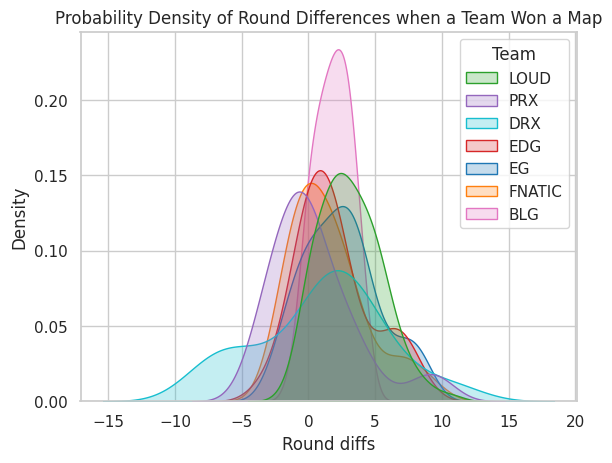

In [193]:
sns.set_theme(style='whitegrid')
palette = {"LOUD":"tab:green",
           "PRX":"tab:purple",
           "DRX":"tab:cyan",
           "EDG":"tab:red",
           "EG":"tab:blue",
           "FNATIC":"tab:orange",
           "BLG":"tab:pink"}
sns.kdeplot(data=df, x="Round diffs", hue="Team", fill=True, common_norm=False, palette=palette).set(title="Probability Density of Round Differences when a Team Won a Map")

[Text(0.5, 1.0, 'Cumulative Density of Round Differences when a Team Won a Map')]

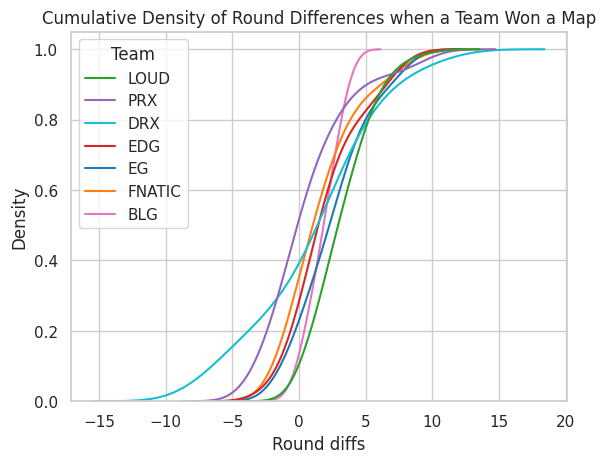

In [194]:
sns.kdeplot(data=df, x="Round diffs", hue="Team", cumulative=True, common_norm=False, palette=palette).set(title="Cumulative Density of Round Differences when a Team Won a Map")

## Probability a team win the map when they have negative round differences

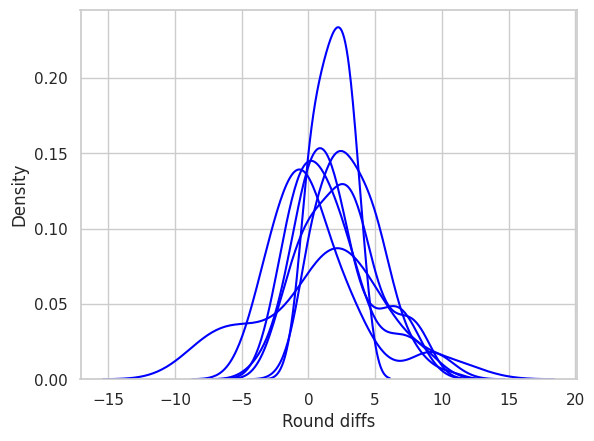

In [195]:
# Probability winning a negative round diffs
teams = df["Team"].unique()
probability = []

for team in teams:
  ax = sns.kdeplot(data=df[df["Team"] == team], x="Round diffs",common_norm=False, color="blue")
  # Get all the lines used to draw the density curve
  kde_lines = ax.get_lines()[-1]
  kde_x, kde_y = kde_lines.get_data()

  # Mask area under the curve that less than 0
  mask = kde_x < 0
  filled_x, filled_y = kde_x[mask], kde_y[mask]

  # Area of less than 0
  area = np.round(np.trapz(filled_y, filled_x)*100, 2)
  probability.append(area)

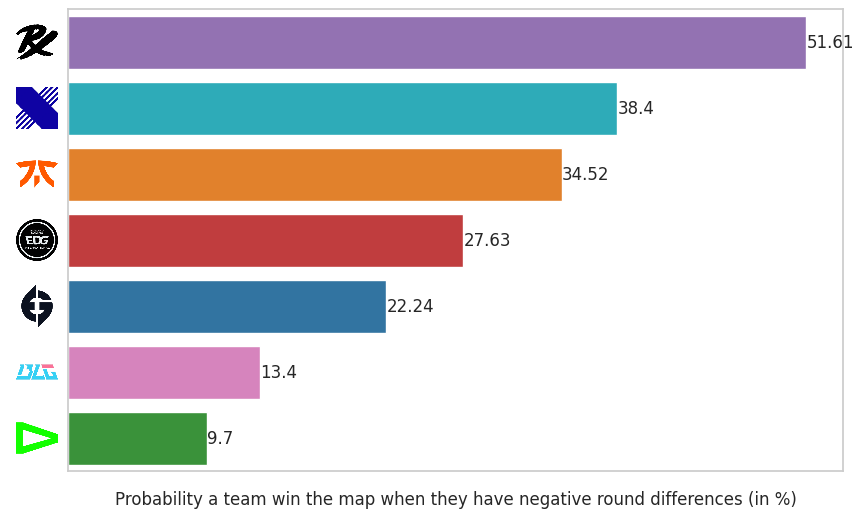

In [196]:
result = pd.DataFrame([teams, probability]).T
result.columns = ["Team", "Probability a team win the map when they have negative round differences (in %)"]
result.sort_values(by="Probability a team win the map when they have negative round differences (in %)", ascending=False, inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(data=result, x="Probability a team win the map when they have negative round differences (in %)", y="Team", palette=palette)

images = [plt.imread(team + ".png") for team in result["Team"]]
tick_labels = ax.yaxis.get_ticklabels()

ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.grid(False)

for i in ax.containers:
    ax.bar_label(i,)

for i,image in enumerate(images):
    ib = OffsetImage(image, zoom=.15)
    ib.image.axes = ax
    ab = AnnotationBbox(ib,
                    tick_labels[i].get_position(),
                    frameon=False,
                    box_alignment=(1.25, 0.5)
                    )
    ax.add_artist(ab)

##Probability a team win the map when they have -6 round differences

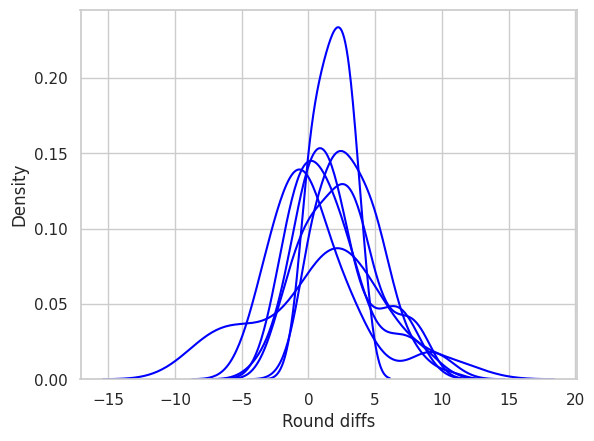

In [197]:
# Probability winning a -6 round difference
teams = df["Team"].unique()
probability = []

for team in teams:
  ax = sns.kdeplot(data=df[df["Team"] == team], x="Round diffs",common_norm=False, color="blue")
  # Get all the lines used to draw the density curve
  kde_lines = ax.get_lines()[-1]
  kde_x, kde_y = kde_lines.get_data()

  # Mask area under the curve that less than -6
  mask = kde_x < -6
  filled_x, filled_y = kde_x[mask], kde_y[mask]

  # Area of less than -6
  area = np.round(np.trapz(filled_y, filled_x)*100, 2)
  #print("The probability that {} won a map when experiences 9-3 curse is: {}%".format(team, area))
  probability.append(area)

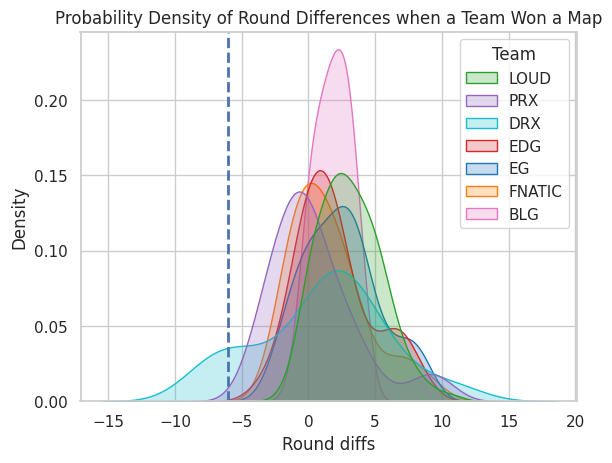

In [198]:
sns.set_theme(style='whitegrid')
sns.kdeplot(data=df, x="Round diffs", hue="Team", fill=True, common_norm=False, palette=palette).set(title="Probability Density of Round Differences when a Team Won a Map")
plt.axvline(x=-6, linewidth=2, linestyle='--')

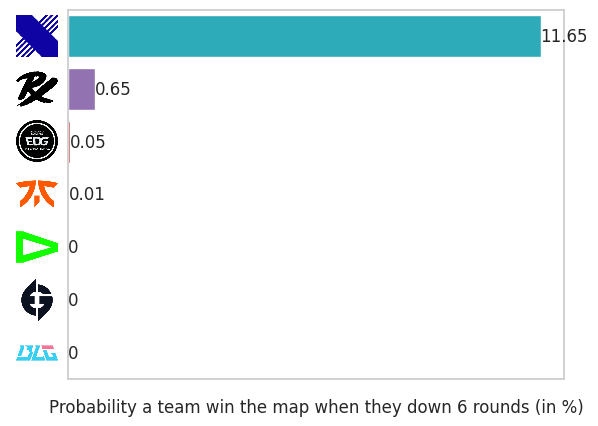

In [199]:
result = pd.DataFrame([teams, probability]).T
result.columns = ["Team", "Probability a team win the map when they down 6 rounds (in %)"]
result.sort_values(by="Probability a team win the map when they down 6 rounds (in %)", ascending=False, inplace=True)
ax = sns.barplot(data=result, x="Probability a team win the map when they down 6 rounds (in %)", y="Team", palette=palette)

images = [plt.imread(team + ".png") for team in result["Team"]]
tick_labels = ax.yaxis.get_ticklabels()

ax.set(yticklabels=[])
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.grid(False)

for i in ax.containers:
    ax.bar_label(i,)

for i,image in enumerate(images):
    ib = OffsetImage(image, zoom=.15)
    ib.image.axes = ax
    ab = AnnotationBbox(ib,
                    tick_labels[i].get_position(),
                    frameon=False,
                    box_alignment=(1.25, 0.5)
                    )
    ax.add_artist(ab)

## Thankyou for visiting! :D